In [2]:
import os
import sys

sys.path.append(f"{os.getcwd()}/../")

In [180]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics.pairwise import cosine_distances
from sklearn.manifold import TSNE

from gensim.models import Word2Vec, KeyedVectors, Doc2Vec
from gensim.test.utils import get_tmpfile

%matplotlib inline

In [4]:
fname = get_tmpfile(f"{os.getcwd()}/../models/w2v.vectors.kv")
w2v = KeyedVectors.load(fname, mmap='r')

In [5]:
print(f"Tokens: {len(w2v.wv.vocab.keys())}")

Tokens: 470098


In [12]:
for word in [
    "preto", "branco", "pássaro", "lobo", "mulher", "masculino", "sexo", "montanha", "oceano", 
    "lua", "amor", "senhor", "cimegripe", "nimesulida", "médico",  "doença", "coração", "febre",
    "dor", "coriza", "rancor", "mau", "ódio", "braço", "maçã", "coco", ["lobo", "mau"],
    "espada", "cavaleiro", "rei", "arthur", ["rei", "arthur"]
]:
    print(f"{word}:")
    print("-" * 28)
    for w in w2v.most_similar(word)[:3]:
        print(w[0].ljust(20), round(w[1], 5))
    print()

preto:
----------------------------
dourado              0.69609
cinza                0.6934
roxo                 0.6605

branco:
----------------------------
branca               0.69341
roxo                 0.68869
cor                  0.68784

pássaro:
----------------------------
papagaio             0.85398
elefante             0.84935
cervo                0.83688

lobo:
----------------------------
grilo                0.67553
lobos                0.67445
papagaio             0.66639

mulher:
----------------------------
homem                0.82249
marido               0.73247
menina               0.71697

masculino:
----------------------------
feminino             0.91455
masculina            0.72587
sexo                 0.72037

sexo:
----------------------------
masculino            0.72037
casadas              0.69381
gays                 0.68765

montanha:
----------------------------
montanhas            0.79327
cume                 0.78206
encosta              0.76285

o

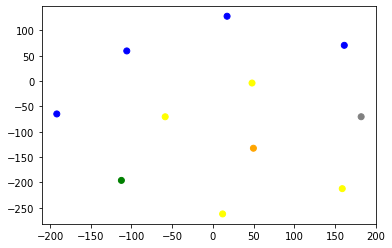

In [208]:
ls = []
for word in [
    "alegria", "felicidade", "supresa", "confiança",
    "amor", "temor", "submissão",
    "tristeza", "raiva", "medo", "desgosto"
]:
    latent = w2v[word]
    if latent.ndim > 1:
        latent = np.sum(latent, axis=0)
    ls.append(np.asarray(latent))
X = np.asarray(ls)

X_embedded = TSNE(n_components=2, perplexity=35, n_iter=1000, n_jobs=-1).fit_transform(cosine_distances(X))

colors = ["yellow", "yellow", "yellow", "yellow"]
colors += ["orange", "gray", "green"]
colors += ["blue", "blue", "blue", "blue"]

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors)
plt.show()

In [183]:
# for word in [
#     "perplexo"
# ]:
#     print(f"{word}:")
#     print("-" * 28)
#     for w in w2v.most_similar(word, topn=50):
#         print(w[0])
#         # print(w[0].ljust(20), round(w[1], 5))
#     print()